<a href="https://colab.research.google.com/github/rodeoai/The-AI-Handbook-Series/blob/main/AI_Model_Handbook_Chap_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI Model Handbook 
## Chapter 3: Unsupervised Machine Learning Models

# Unsupervised Learning

In [ ]:
import pandas as pd
stockdata=pd.read_csv(data_directory+'dow_jones_index.data')  

In [ ]:
stockdata.date=pd.to_datetime(stockdata.date).dt.date

In [ ]:
stockdata.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,2011-01-14,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,2011-01-21,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,2011-01-28,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2011-02-04,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [ ]:
set(stockdata.stock)

{'AA',
 'AXP',
 'BA',
 'BAC',
 'CAT',
 'CSCO',
 'CVX',
 'DD',
 'DIS',
 'GE',
 'HD',
 'HPQ',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'KO',
 'KRFT',
 'MCD',
 'MMM',
 'MRK',
 'MSFT',
 'PFE',
 'PG',
 'T',
 'TRV',
 'UTX',
 'VZ',
 'WMT',
 'XOM'}

In [ ]:
stockdata1=stockdata.pivot(index='date',columns='stock')['percent_change_price']
stockdata2=stockdata.pivot(index='stock',columns='date')['percent_change_price']

X1=stockdata1
X2=stockdata2

In [ ]:
stockdata0=stockdata.loc[:,['percent_change_price']]

In [ ]:
stockdata0.index=stockdata['stock']

In [ ]:
stockdata0.head()
X0=stockdata0

In [ ]:
stockdata1.head()

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,HD,HPQ,IBM,INTC,JNJ,JPM,KO,KRFT,MCD,MMM,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-07,3.79267,2.448040,4.88284,2.88809,-0.688705,2.542790,-0.512765,-0.579421,4.531000,-0.32450,-2.329550,6.79773,0.489097,-1.665870,-0.047900,1.488370,-4.493020,-1.794710,-3.540860,-0.599424,2.920910,1.960780,3.615820,0.170834,-2.796500,-4.920660,-0.138906,-0.36051,-0.276600,2.536630
2011-01-14,-4.42849,4.638010,0.93633,7.62174,0.858277,1.289400,2.067070,3.105590,0.717765,1.12843,5.064400,3.09853,2.040820,1.786580,0.417402,3.790150,0.685805,1.391140,-0.255892,2.800470,-8.132040,0.354610,0.658617,1.754660,-0.385424,2.842620,1.034880,-2.98222,2.162160,3.607080
2011-01-21,-2.47066,-0.065175,1.15721,-5.50398,-1.497450,-2.356270,0.903809,-2.382390,1.714870,4.00421,1.501250,2.36238,3.791220,-0.998573,0.723356,0.599733,-0.696092,-0.191022,0.482251,1.650730,-0.498973,-0.497159,0.054496,0.396040,-0.770578,0.695716,1.160440,-1.21538,1.125020,1.529760
2011-01-28,1.63831,-4.755700,-3.20190,-4.56140,3.203540,0.431862,-0.553840,3.819160,-1.992940,1.35474,0.658256,-2.52731,2.438550,2.044700,-4.076090,-1.481970,-1.049790,-2.739730,-1.306400,-1.984080,-2.706680,-0.963597,-0.981997,-2.579670,-3.408290,1.215090,1.457760,2.15023,2.365050,0.177552
2011-02-04,5.93325,-0.702470,3.06093,4.23049,3.599290,5.351170,3.473630,4.745760,4.277660,2.13612,-0.888769,4.44836,3.028020,0.603248,1.130320,0.405314,0.385109,2.161810,0.338753,0.409417,-1.201560,0.000000,6.102250,-1.149960,2.005840,2.866870,0.880196,1.87991,-0.744021,4.204200


In [ ]:
stockdata2.head()

date,2011-01-07,2011-01-14,2011-01-21,2011-01-28,2011-02-04,2011-02-11,2011-02-18,2011-02-25,2011-03-04,2011-03-11,2011-03-18,2011-03-25,2011-04-01,2011-04-08,2011-04-15,2011-04-21,2011-04-29,2011-05-06,2011-05-13,2011-05-20,2011-05-27,2011-06-03,2011-06-10,2011-06-17,2011-06-24
stock,,,,,,,,,,,,,,,,,,,,,,,,,
AA,3.792670,-4.428490,-2.470660,1.63831,5.93325,0.230814,-0.632547,-1.766780,-1.368230,-3.317250,1.003130,4.33455,1.984820,2.870260,-8.527130,3.72861,0.354191,-0.694847,-0.349650,-4.35294,3.258150,-4.84160,-4.02010,-3.72793,3.817310
AXP,2.448040,4.638010,-0.065175,-4.75570,-0.70247,6.346680,-1.917280,-3.137520,-0.022868,0.957592,0.706794,1.87709,-0.395257,1.468980,-0.237274,2.74809,4.005090,1.681180,-1.138630,3.58155,0.768624,-4.10586,-2.82923,1.12594,-0.020682
BA,4.882840,0.936330,1.157210,-3.20190,3.06093,0.993980,0.467675,-0.069109,-0.924520,0.055866,-2.908530,4.33917,0.693878,0.122649,-1.425660,3.74037,5.654880,-1.294340,-0.353045,-1.44928,0.574788,-3.80463,-2.76886,1.50561,-3.650620
BAC,2.888090,7.621740,-5.503980,-4.56140,4.23049,1.791870,-0.135410,-1.251740,-1.051160,1.410440,-1.542780,-6.05634,-0.372578,0.597015,-5.037040,-2.22399,-0.324675,-0.404531,-2.850160,-2.60723,1.918050,-4.97051,-3.39893,-1.92837,-0.661001
CAT,-0.688705,0.858277,-1.497450,3.20354,3.59929,3.934950,2.220930,-2.727450,0.311526,-3.287570,2.407640,2.04864,3.268210,-3.454950,-2.554080,3.63705,5.648110,-5.075710,-4.034300,-1.45461,3.257650,-4.99013,-3.45137,-1.01104,3.648050


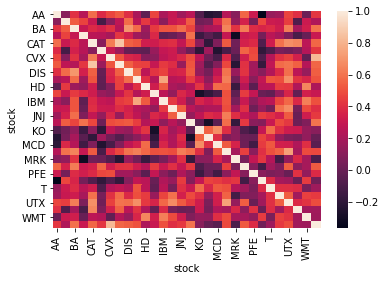

In [ ]:
sns.heatmap(stockdata1.corr())

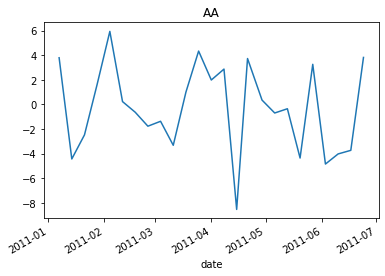

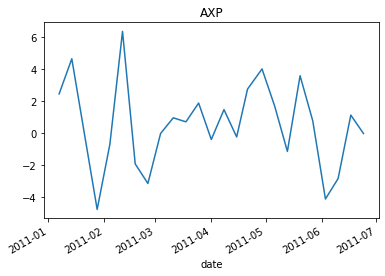

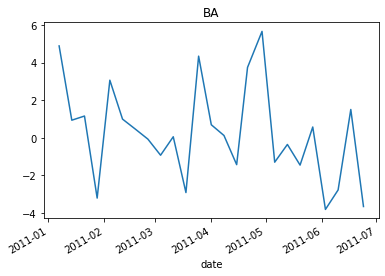

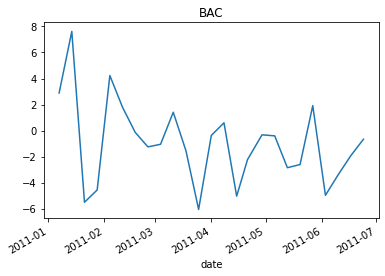

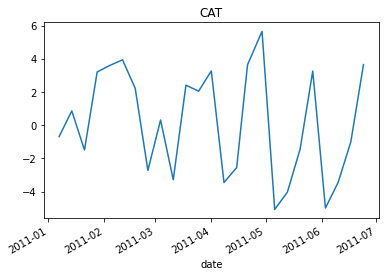

In [ ]:
for i in range(5):
  stockdata1[stockdata1.columns[i]].plot()
  plt.title(stockdata1.columns[i])
  plt.show()

In [ ]:
retvoltable=pd.concat([stockdata1.mean(),stockdata1.std(),stockdata1.skew(),stockdata1.kurtosis()],axis=1)
retvoltable.columns=['return','volatility','skew','kurtosis']

X3=retvoltable

In [ ]:
X3.head()

,return,volatility,skew,kurtosis
stock,,,,
AA,-0.302084,3.588814,-0.269700,-0.474419
AXP,0.521029,2.678678,0.015810,0.019810
BA,0.253427,2.613224,0.383238,-0.366092
BAC,-0.976965,3.218526,0.639024,0.788749
CAT,0.152660,3.259750,-0.103655,-1.397139


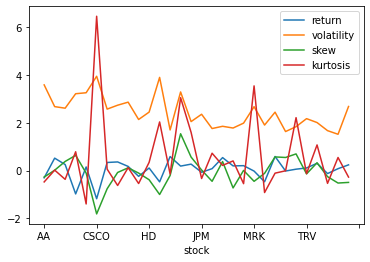

In [ ]:
X3.plot()

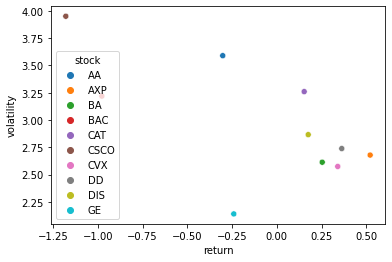

In [ ]:
import seaborn as sns

sns.scatterplot(data=X3.iloc[:10], x='return',y='volatility', hue=X3.iloc[:10].index)

In [ ]:
X1.head()

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,HD,HPQ,IBM,INTC,JNJ,JPM,KO,KRFT,MCD,MMM,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-07,3.79267,2.448040,4.88284,2.88809,-0.688705,2.542790,-0.512765,-0.579421,4.531000,-0.32450,-2.329550,6.79773,0.489097,-1.665870,-0.047900,1.488370,-4.493020,-1.794710,-3.540860,-0.599424,2.920910,1.960780,3.615820,0.170834,-2.796500,-4.920660,-0.138906,-0.36051,-0.276600,2.536630
2011-01-14,-4.42849,4.638010,0.93633,7.62174,0.858277,1.289400,2.067070,3.105590,0.717765,1.12843,5.064400,3.09853,2.040820,1.786580,0.417402,3.790150,0.685805,1.391140,-0.255892,2.800470,-8.132040,0.354610,0.658617,1.754660,-0.385424,2.842620,1.034880,-2.98222,2.162160,3.607080
2011-01-21,-2.47066,-0.065175,1.15721,-5.50398,-1.497450,-2.356270,0.903809,-2.382390,1.714870,4.00421,1.501250,2.36238,3.791220,-0.998573,0.723356,0.599733,-0.696092,-0.191022,0.482251,1.650730,-0.498973,-0.497159,0.054496,0.396040,-0.770578,0.695716,1.160440,-1.21538,1.125020,1.529760
2011-01-28,1.63831,-4.755700,-3.20190,-4.56140,3.203540,0.431862,-0.553840,3.819160,-1.992940,1.35474,0.658256,-2.52731,2.438550,2.044700,-4.076090,-1.481970,-1.049790,-2.739730,-1.306400,-1.984080,-2.706680,-0.963597,-0.981997,-2.579670,-3.408290,1.215090,1.457760,2.15023,2.365050,0.177552
2011-02-04,5.93325,-0.702470,3.06093,4.23049,3.599290,5.351170,3.473630,4.745760,4.277660,2.13612,-0.888769,4.44836,3.028020,0.603248,1.130320,0.405314,0.385109,2.161810,0.338753,0.409417,-1.201560,0.000000,6.102250,-1.149960,2.005840,2.866870,0.880196,1.87991,-0.744021,4.204200


In [ ]:
X2.head()

date,2011-01-07,2011-01-14,2011-01-21,2011-01-28,2011-02-04,2011-02-11,2011-02-18,2011-02-25,2011-03-04,2011-03-11,2011-03-18,2011-03-25,2011-04-01,2011-04-08,2011-04-15,2011-04-21,2011-04-29,2011-05-06,2011-05-13,2011-05-20,2011-05-27,2011-06-03,2011-06-10,2011-06-17,2011-06-24
stock,,,,,,,,,,,,,,,,,,,,,,,,,
AA,3.792670,-4.428490,-2.470660,1.63831,5.93325,0.230814,-0.632547,-1.766780,-1.368230,-3.317250,1.003130,4.33455,1.984820,2.870260,-8.527130,3.72861,0.354191,-0.694847,-0.349650,-4.35294,3.258150,-4.84160,-4.02010,-3.72793,3.817310
AXP,2.448040,4.638010,-0.065175,-4.75570,-0.70247,6.346680,-1.917280,-3.137520,-0.022868,0.957592,0.706794,1.87709,-0.395257,1.468980,-0.237274,2.74809,4.005090,1.681180,-1.138630,3.58155,0.768624,-4.10586,-2.82923,1.12594,-0.020682
BA,4.882840,0.936330,1.157210,-3.20190,3.06093,0.993980,0.467675,-0.069109,-0.924520,0.055866,-2.908530,4.33917,0.693878,0.122649,-1.425660,3.74037,5.654880,-1.294340,-0.353045,-1.44928,0.574788,-3.80463,-2.76886,1.50561,-3.650620
BAC,2.888090,7.621740,-5.503980,-4.56140,4.23049,1.791870,-0.135410,-1.251740,-1.051160,1.410440,-1.542780,-6.05634,-0.372578,0.597015,-5.037040,-2.22399,-0.324675,-0.404531,-2.850160,-2.60723,1.918050,-4.97051,-3.39893,-1.92837,-0.661001
CAT,-0.688705,0.858277,-1.497450,3.20354,3.59929,3.934950,2.220930,-2.727450,0.311526,-3.287570,2.407640,2.04864,3.268210,-3.454950,-2.554080,3.63705,5.648110,-5.075710,-4.034300,-1.45461,3.257650,-4.99013,-3.45137,-1.01104,3.648050


In [ ]:
X3.head()

,return,volatility,skew,kurtosis
stock,,,,
AA,-0.302084,3.588814,-0.269700,-0.474419
AXP,0.521029,2.678678,0.015810,0.019810
BA,0.253427,2.613224,0.383238,-0.366092
BAC,-0.976965,3.218526,0.639024,0.788749
CAT,0.152660,3.259750,-0.103655,-1.397139
